In [2]:
import scipy as sp
import scipy.misc as misc

img_gray = sp.misc.face(gray=True)
img_gray.shape

(768, 1024)

## 그레이스케일

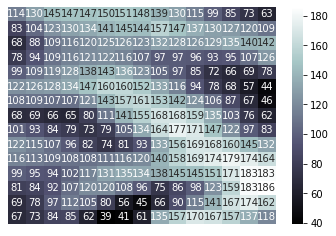

In [7]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(img_gray[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()


In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl

In [25]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## RGB

In [9]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

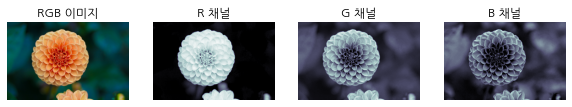

In [41]:
plt.figure(figsize=(10, 2))

plt.subplot(141)  #subplot  여러개 그래프 한번에 그리기
plt.imshow(img_rgb[50:, 50:, :])
plt.axis('off')  # 축 없애기
plt.title('RGB 이미지')

plt.subplot(142)
plt.imshow(img_rgb[50:, 50:, 0], cmap=plt.cm.bone)
plt.axis('off')
plt.title('R 채널')

plt.subplot(143)
plt.imshow(img_rgb[50:, 50:, 1], cmap=plt.cm.bone)
plt.axis('off')
plt.title('G 채널')

plt.subplot(144)
plt.imshow(img_rgb[50:, 50:, 2], cmap=plt.cm.bone)
plt.axis('off')
plt.title('B 채널')

plt.show()

## HSV

In [44]:
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S*1.0, V))
RGB_S100= hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S*0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape


(100, 360, 3)

In [45]:
#색상 (Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [46]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [47]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

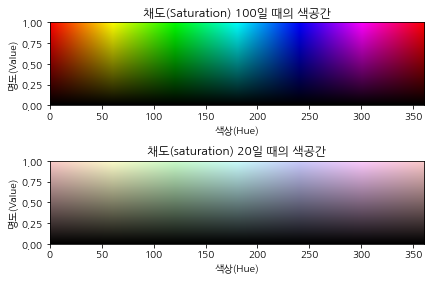

In [49]:
plt.subplot(211)
plt.imshow(RGB_S100, origin='lower', extent=[0, 360, 0, 1], aspect=80)
plt.xlabel('색상(Hue)')
plt.ylabel('명도(Value)')
plt.title('채도(Saturation) 100일 때의 색공간')
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin='lower', extent=[0, 360, 0, 1], aspect=80)
plt.xlabel('색상(Hue)')
plt.ylabel('명도(Value)')
plt.title('채도(saturation) 20일 때의 색공간')
plt.grid(False)

plt.tight_layout()
plt.show()

## Pillow

In [51]:
import PIL
PIL.__version__

'8.4.0'

In [53]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=d608a4c8c15dfa176657d21a2345f14f9ac47fa1f3cc58a41ec6398a60d6c824
  Stored in directory: c:\users\82107\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget



In [54]:
import wget

In [66]:
site_url = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
logo= wget.download(site_url)


100% [..............................................................................] 83564 / 83564

In [77]:
from PIL import Image

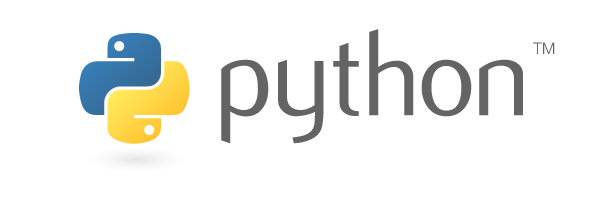

In [83]:
Image.open(logo)

In [85]:
test_image = Image.open(logo)

In [86]:
test_image.size

(601, 203)

In [87]:
test_image.save('logo.bmp')
test_image_bmp = Image.open('logo.bmp')

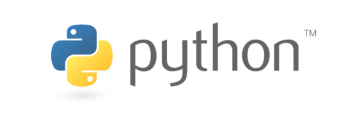

In [88]:
img_logo_array = np.array(test_image_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

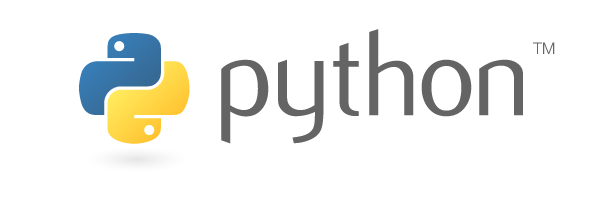

In [90]:
Image.fromarray(img_logo_array)

### 이미지 크기 변환

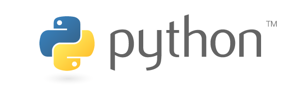

In [93]:
img_logo_png2 = test_image.resize((300, 100))
img_logo_png2

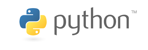

In [94]:
img_logo_thumbnail = test_image.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

### 이미지 회전

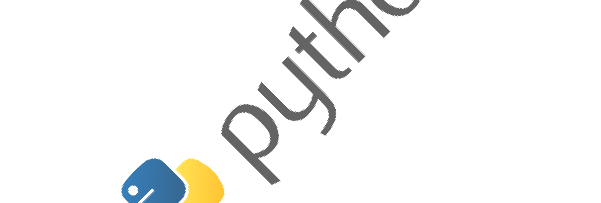

In [95]:
img_logo_rotated = test_image.rotate(45)
img_logo_rotated

### 이미지 잘라내기

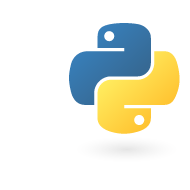

In [96]:
img_logo_cropped = test_image.crop((10, 10, 200, 200))
img_logo_cropped

## Scikit-Image

In [99]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [101]:
import skimage
skimage.__version__

'0.19.1'

### 샘플 이미지

In [102]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

### 이미지 읽고 쓰기

In [103]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

### 색공간 변환

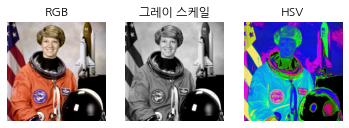

In [104]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()